# Importing Libraries

In [62]:
# importing all the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE  
import seaborn as sns

from sklearn.feature_selection import chi2        
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [63]:
# setting maximum columns and maximum rows

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Loading Dataset

In [66]:
df = pd.read_csv("datasets/cardiovascular.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Handling Missing values

In [34]:
# Checking no. of null values in the data
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [35]:
# Imputing missing values

# handling numerical columns
median_imputer = SimpleImputer(strategy = 'median')

df["cigsPerDay"] = median_imputer.fit_transform(df[["cigsPerDay"]]).ravel()
df["totChol"] = median_imputer.fit_transform(df[["totChol"]]).ravel()
df["BMI"] = median_imputer.fit_transform(df[["BMI"]]).ravel()
df["heartRate"] = median_imputer.fit_transform(df[["heartRate"]]).ravel()
df["glucose"] = median_imputer.fit_transform(df[["glucose"]]).ravel()

# defining imputer for categorical columns
mod_imputer = SimpleImputer(strategy = 'most_frequent')

df["education"] = mod_imputer.fit_transform(df[["education"]]).ravel()
df["BPMeds"] = mod_imputer.fit_transform(df[["BPMeds"]]).ravel()





In [36]:
# Checking no. of null values in the data
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Handling Duplicate Data Points

In [37]:
# checking for duplicate rows
df.duplicated().sum()

0

# EDA

In [38]:
numerical_features = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
cat_features = ['education','male','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
dep_feature = "TenYearCHD"

### Univariate Analysis

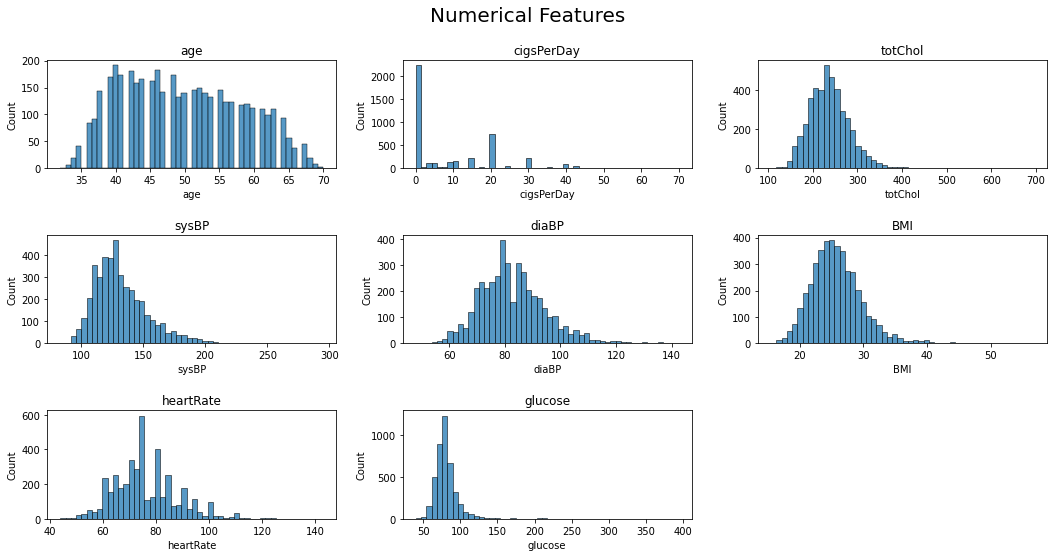

In [39]:
# Plotting distribution of values of cts numerical features
  
plt.figure(figsize=(15,15))
plt.suptitle("Numerical Features", fontsize=20)

for i in range(0,len(numerical_features)):
    plt.subplot(6,3, i+1)
    sns.histplot(x=df[numerical_features[i]], bins = 50)
    plt.title(numerical_features[i])
    plt.tight_layout(pad = 2)

Most of the features are Left Skewed

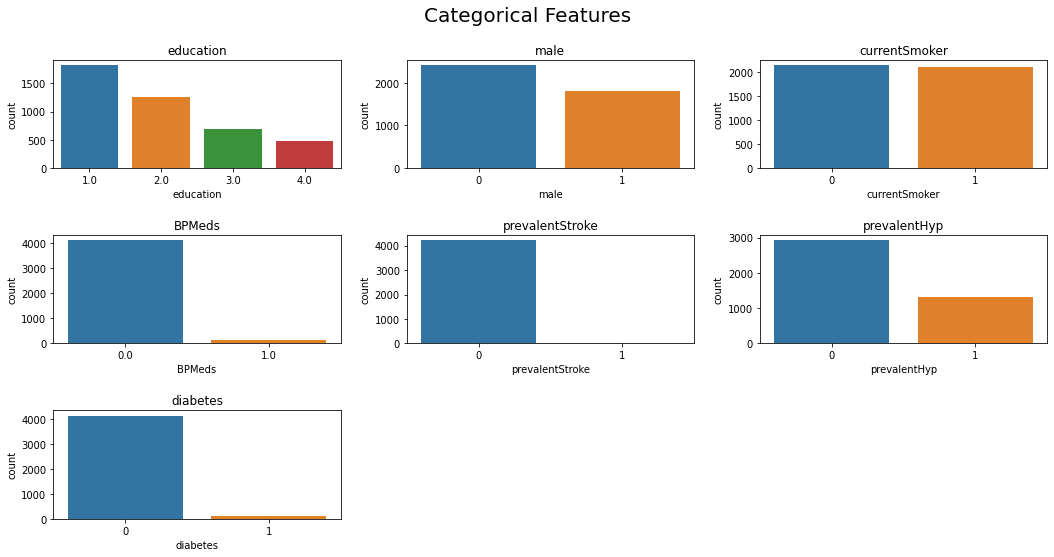

In [40]:
# plotting the count plot of categorical features
  
plt.figure(figsize=(15,15))
plt.suptitle("Categorical Features", fontsize=20)

for i in range(0,len(cat_features)):
    plt.subplot(6,3, i+1)
    sns.countplot(x=df[cat_features[i]])
    plt.title(cat_features[i])
    plt.tight_layout(pad = 2)

"diabetes", "PrevalenStroke", "BPMeds" are imbalanced

### Bivariate analysis

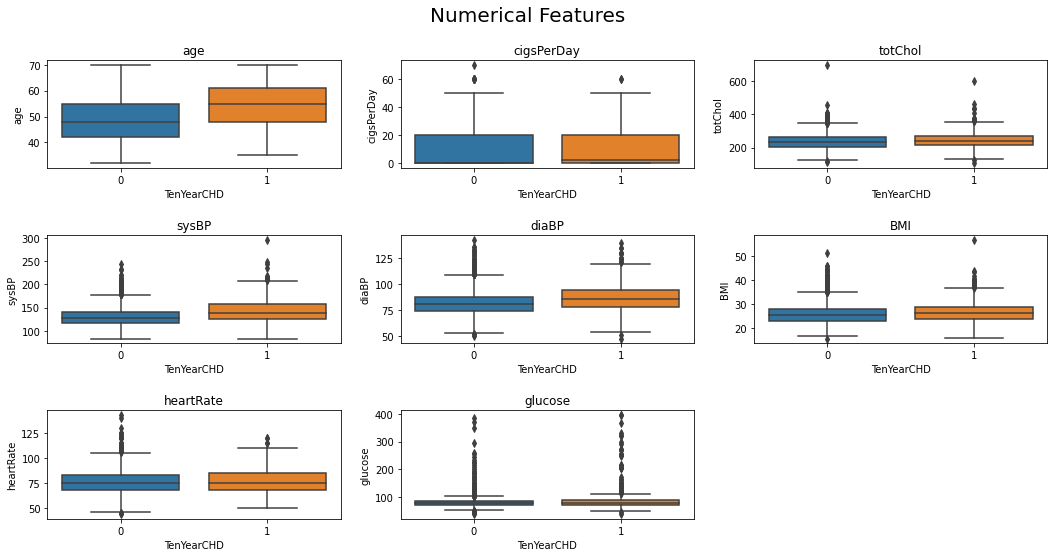

In [41]:
# plotting boxplot for continous features for each class of dependent feature.


  
plt.figure(figsize=(15,15))
plt.suptitle("Numerical Features", fontsize=20)

for i in range(0,len(numerical_features)):
    plt.subplot(6,3, i+1)
    sns.boxplot(x = df[dep_feature],y = df[numerical_features[i]])
    plt.title(numerical_features[i])
    plt.tight_layout(pad = 2)

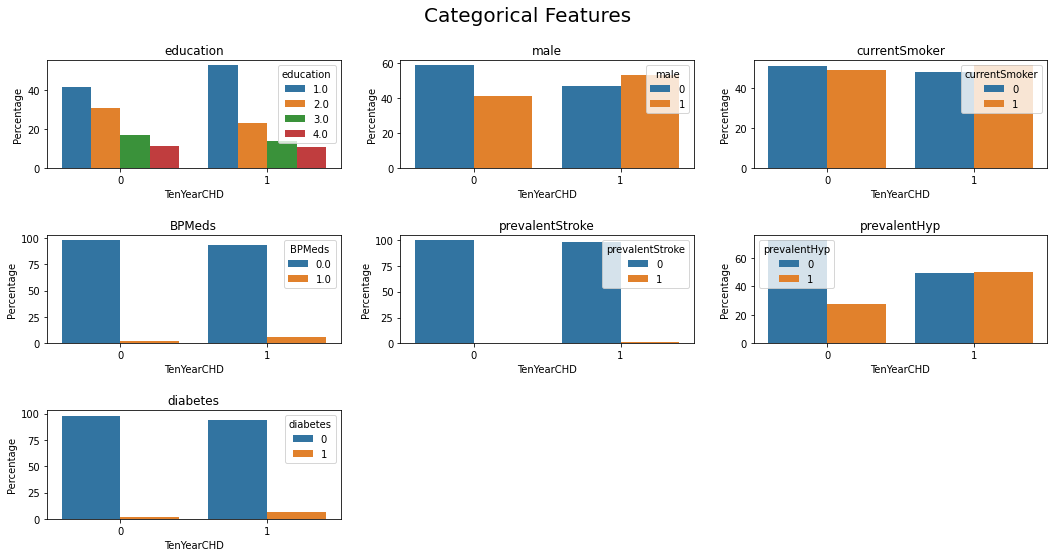

In [42]:
#  bivariate analysis for categorical features

plt.figure(figsize=(15,15))
plt.suptitle("Categorical Features", fontsize=20)


df_groupby = df.groupby(by = dep_feature)   # Grouping data by dependent variable
for i in range(0,len(cat_features)):
    plt.subplot(6,3, i+1)
    df_plot = pd.DataFrame((df_groupby[cat_features[i]].value_counts()/df_groupby[dep_feature].count())*100).reset_index().rename(columns = {0:'Percentage'})
    sns.barplot(x = df_plot[dep_feature], y = df_plot['Percentage'] , hue = df_plot[cat_features[i]])
  
    plt.title(cat_features[i])
    plt.tight_layout(pad = 2)




More percentage of men are at high risk for getting cardiovascular disease. </br></br>
Higher percentage of people who are smoking are at high risk.

# Multivariate Analysis

<AxesSubplot:>

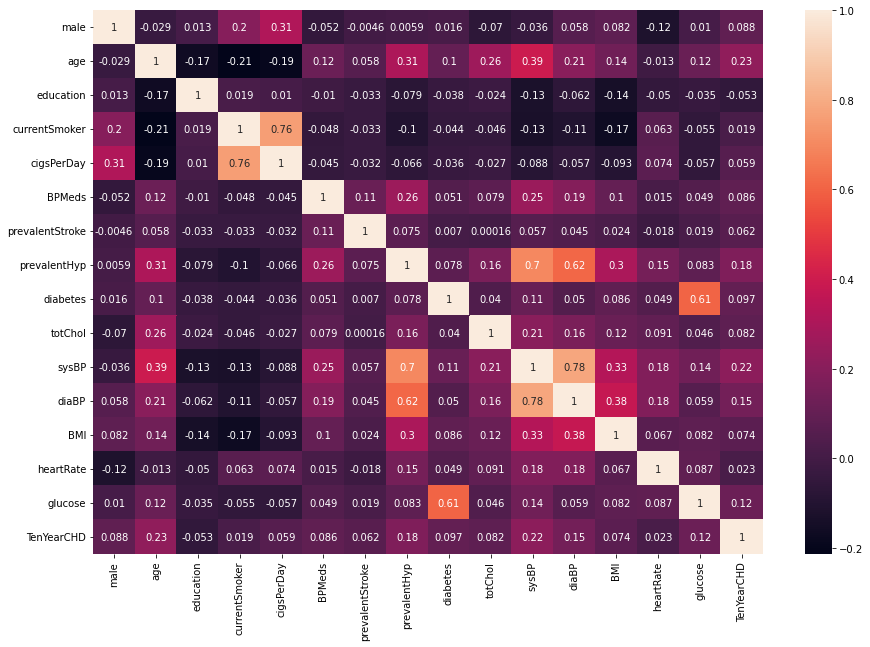

In [43]:
# Checking correlation of each numerical feature
plt.figure(figsize = (15,10))

sns.heatmap(df.corr(), annot=True)


"CigsPerDay" and "CurrentSmoker" are highly correlated with each other. <br>

"SysBp" and "diaBp" are highly correlated with each other. <br>

"PrevalentHyp" and "SysBp" are highly correlated with each other. <br>

'diaBP' and 'prevalentHyp' are also 0.61 correlated.


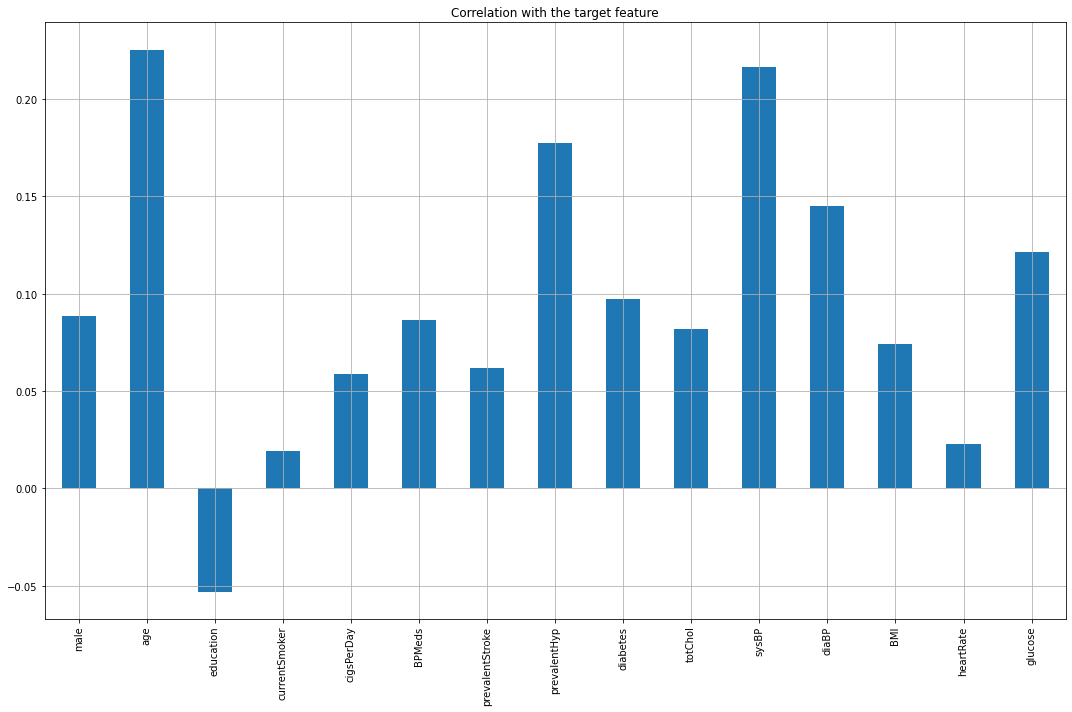

In [44]:
# plotting correaltion with dependent feature

df.drop(dep_feature, axis=1).corrwith(df[dep_feature]).plot(kind='bar', grid=True, figsize=(15, 10),title="Correlation with the target feature")
plt.tight_layout()

No feature is strongly correlated with the dependent variable.


# Feature Selection

### calculating chi scores and corresponding p-values for only categorical features

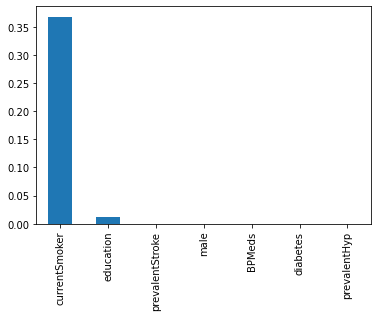

In [45]:

  
chi_scores = chi2(df[cat_features],df[dep_feature])    

p_values = pd.Series(chi_scores[1],index = df[cat_features].columns)     
p_values.sort_values(ascending = False , inplace = True)                       

p_values.plot.bar()
plt.show()                                                     
     

Since, p-value for 'currentSmoking' is very high, so we will drop that column.

In [46]:
df.drop(columns=["currentSmoker"], inplace=True)

### Multicollinearity between features using Variance Inflation factor

In [47]:
# calculating the vif for all the independent features

def calc_VIF(x):
  vif= pd.DataFrame()
  vif['variables']=x.columns
  vif["VIF"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  return(vif)

vif=calc_VIF(df.drop(columns=[dep_feature]))
vif


,variables,VIF
0,male,2.083460
1,age,40.867252
2,education,4.571392
3,cigsPerDay,1.838935
4,BPMeds,1.131032
5,prevalentStroke,1.024882
6,prevalentHyp,2.370654
7,diabetes,1.566398
8,totChol,31.443660
9,sysBP,137.599228


Since 'sysBP' and 'diaBP' have high correlation we will drop one of them.

In [48]:
df.drop(columns=["diaBP"], inplace=True)

### Finalized Features 

In [49]:
numerical_features = ['age','cigsPerDay','totChol','sysBP','BMI','heartRate','glucose']
cat_features = ['education','male','BPMeds','prevalentStroke','prevalentHyp','diabetes']
dep_feature = "TenYearCHD"

# Handling Skewness

In [50]:
# checking skewness of numerical features
df[numerical_features].skew()  

age           0.228867
cigsPerDay    1.256611
totChol       0.879159
sysBP         1.145285
BMI           0.985646
heartRate     0.644498
glucose       6.542928
dtype: float64


- Positive value means the distribution is skewed to the right.
- Negative value means the distribution is skewed to the left.
- 0 means perfect normal distribution. The bell shaped curve.

In [51]:
# Apply sqrt transformation to reduce skewness
np.sqrt(df[numerical_features]).skew()

age           0.105252
cigsPerDay    0.509391
totChol       0.385119
sysBP         0.858119
BMI           0.629405
heartRate     0.377483
glucose       4.145685
dtype: float64

In [52]:

# Applying log10 transformation to reduce skewness
np.log(df[numerical_features]).skew()

/home/ali/Pictures/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


age          -0.019751
cigsPerDay         NaN
totChol       0.008518
sysBP         0.601115
BMI           0.315354
heartRate     0.121898
glucose       2.390527
dtype: float64

In [53]:
# from above we pick the skewness score near zero

df[['totChol','sysBP','BMI','heartRate','glucose']] = np.log(df[['totChol','sysBP','BMI','heartRate','glucose']])
df[['cigsPerDay']] = np.sqrt(df[['cigsPerDay']])


# Handling Imbalanced Columns

In [54]:
# checking the dependent variable

df[dep_feature].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

As we can see that we have imbalanced dataset, so we need to handle it.

In [55]:
smote = SMOTE()                             
X, y = smote.fit_resample(df.drop(columns=[dep_feature]), df[dep_feature])   

print('Original dataset shape', len(df[dep_feature]))
print('Resampled dataset shape', len(y))

Original dataset shape 4240
Resampled dataset shape 7192


# Saving dataframe for training

In [56]:
X.to_csv("datasets/X_balanced.csv", index=False)
y.to_csv("datasets/y_balanced.csv", index=False)